In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [7]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(-1,28,28).astype('float32')/255.0
x_test = x_test.reshape(-1,28,28).astype('float32')/255.0

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
def create_model():
  model = models.Sequential([

      layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (28,28,1)),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(64,(3,3), activation = 'relu'),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(64,(3,3),activation = 'relu'),
      layers.Flatten(),

      layers.Dense(64,activation = 'relu'),
      layers.Dense(10,activation = 'softmax')
  ])
  return model

In [9]:
optimizers_dict ={
    'SGD' : optimizers.SGD(0.1),
    'SGD+Momentum' : optimizers.SGD(0.1,momentum = 0.9),
    'SGD+Nesterov' : optimizers.SGD(0.1,momentum = 0.9,nesterov = True),
    'Adam' : optimizers.Adam(0.001),
    'RMSprop' : optimizers.RMSprop(0.001),
    'Adagrad' : optimizers.Adagrad(0.1)

}

In [10]:
histories = {}
for name,opt in optimizers_dict.items():
  model = create_model()
  model.compile(optimizer=opt,
                loss ='categorical_crossentropy',
                metrics = ['accuracy'])
  histories[name] = model.fit(x_train,y_train,
                              epochs =10, batch_size =64,
                              validation_split=0.2, verbose =1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7765 - loss: 0.6896 - val_accuracy: 0.9762 - val_loss: 0.0775
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9765 - loss: 0.0764 - val_accuracy: 0.9846 - val_loss: 0.0526
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9850 - loss: 0.0490 - val_accuracy: 0.9859 - val_loss: 0.0530
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9880 - loss: 0.0388 - val_accuracy: 0.9849 - val_loss: 0.0503
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9904 - loss: 0.0300 - val_accuracy: 0.9847 - val_loss: 0.0503
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9925 - loss: 0.0243 - val_accuracy: 0.9877 - val_loss: 0.0443
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9936 - loss: 0.0189 - val_accuracy: 0.9853 - val_loss: 0.0516
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9945 - loss: 0.0172 - val_accuracy: 0.

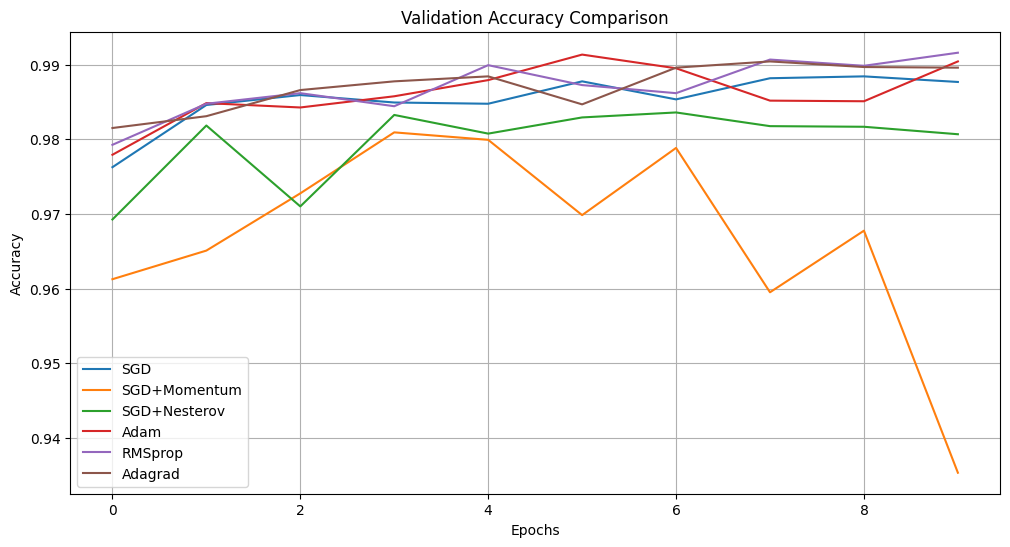

In [12]:
plt.figure(figsize=(12, 6))
for name, hist in histories.items():
    plt.plot(hist.history['val_accuracy'], label=f"{name}")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
